# Hierarchical Clustering

In [238]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [239]:
import os

In [240]:
print(os.__file__)

/opt/anaconda3/lib/python3.13/os.py


In [241]:
pwd

'/Users/abhishekraghav/Desktop/HR Project'

In [242]:
df = pd.read_csv('HR_Data.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17414,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [243]:
data = df.drop(['employee_id','region','age',], axis=1)
data.head()

,department,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,Technology,Bachelors,m,sourcing,1,NaN,1,1,0,77
1,HR,Bachelors,f,other,1,3.0,5,0,0,51
2,Sales & Marketing,Bachelors,m,other,1,1.0,4,0,0,47
3,Procurement,Bachelors,f,other,3,2.0,9,0,0,65
4,Finance,Bachelors,m,sourcing,1,4.0,7,0,0,61


In [244]:
data = pd.get_dummies(data, columns=['department','education','gender','recruitment_channel'])


In [245]:
data['previous_year_rating'] = pd.to_numeric(data['previous_year_rating'], errors='coerce')
data['previous_year_rating'] = data['previous_year_rating'].fillna(3.5)

In [246]:
print(data.isnull().sum())

no_of_trainings                 0
previous_year_rating            0
length_of_service               0
KPIs_met_more_than_80           0
awards_won                      0
avg_training_score              0
department_Analytics            0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
education_Bachelors             0
education_Below Secondary       0
education_Masters & above       0
gender_f                        0
gender_m                        0
recruitment_channel_other       0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
dtype: int64


In [247]:
data.dtypes

no_of_trainings                   int64
previous_year_rating            float64
length_of_service                 int64
KPIs_met_more_than_80             int64
awards_won                        int64
avg_training_score                int64
department_Analytics               bool
department_Finance                 bool
department_HR                      bool
department_Legal                   bool
department_Operations              bool
department_Procurement             bool
department_R&D                     bool
department_Sales & Marketing       bool
department_Technology              bool
education_Bachelors                bool
education_Below Secondary          bool
education_Masters & above          bool
gender_f                           bool
gender_m                           bool
recruitment_channel_other          bool
recruitment_channel_referred       bool
recruitment_channel_sourcing       bool
dtype: object

#### In this step we are importing the Standard Scaler function to scale the data (Computing Z Scores) StandardScaler scales the data by subtracting the observation from the mean of the variable and dividing it by the standard deviation of the variable.

# z = $\frac{(x - \mu)}{\sigma}$

###### Note: All the symbols follow the usual nomeclature.

In [248]:
from sklearn.preprocessing import StandardScaler

In [249]:
#In this step we are defining an empty function. Going forward, you will be seeing this kind of definitions of functions from
# the sklearn library

scale = StandardScaler()

In [250]:
#For 'sklearn' function we have to fit the function into the dataframe. 
#The backend of this function is that now we know the mean and standard deviation of the variables of this particular dataset.

ss = scale.fit(data)
ss

StandardScaler()

In [251]:
#In this step we perform the standard scaling operation mentioned earlier.

ss1 = ss.transform(data)
ss1

array([[-0.42092082,  0.11718869, -1.15003248, ..., -1.12782098,
        -0.13615437,  1.17046243],
       [-0.42092082, -0.29415258, -0.19204335, ...,  0.88666554,
        -0.13615437, -0.85436317],
       [-0.42092082, -1.93951765, -0.43154063, ...,  0.88666554,
        -0.13615437, -0.85436317],
       ...,
       [-0.42092082, -1.93951765,  0.76594578, ...,  0.88666554,
        -0.13615437, -0.85436317],
       [-0.42092082, -1.93951765,  0.76594578, ...,  0.88666554,
        -0.13615437, -0.85436317],
       [-0.42092082,  1.35121249, -0.43154063, ..., -1.12782098,
         7.34460466, -0.85436317]])

In [252]:
data.columns

Index(['no_of_trainings', 'previous_year_rating', 'length_of_service',
       'KPIs_met_more_than_80', 'awards_won', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'education_Bachelors',
       'education_Below Secondary', 'education_Masters & above', 'gender_f',
       'gender_m', 'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'],
      dtype='object')

In [253]:
#Finally we go ahead and put the above values in a dataframe for easier understanding.

pd.DataFrame(ss1,columns=data.columns)

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,...,department_Sales & Marketing,department_Technology,education_Bachelors,education_Below Secondary,education_Masters & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,-0.420921,0.117189,-1.150032,1.336682,-0.154684,1.030250,-0.32856,-0.219704,-0.224119,-0.1394,...,-0.675568,2.630669,0.715558,-0.129209,-0.620435,-0.643744,0.643744,-1.127821,-0.136154,1.170462
1,-0.420921,-0.294153,-0.192043,-0.748121,-0.154684,-0.907476,-0.32856,-0.219704,4.461924,-0.1394,...,-0.675568,-0.380131,0.715558,-0.129209,-0.620435,1.553412,-1.553412,0.886666,-0.136154,-0.854363
2,-0.420921,-1.939518,-0.431541,-0.748121,-0.154684,-1.205587,-0.32856,-0.219704,-0.224119,-0.1394,...,1.480235,-0.380131,0.715558,-0.129209,-0.620435,-0.643744,0.643744,0.886666,-0.136154,-0.854363
3,2.936614,-1.116835,0.765946,-0.748121,-0.154684,0.135915,-0.32856,-0.219704,-0.224119,-0.1394,...,-0.675568,-0.380131,0.715558,-0.129209,-0.620435,1.553412,-1.553412,0.886666,-0.136154,-0.854363
4,-0.420921,0.528530,0.286951,-0.748121,-0.154684,-0.162197,-0.32856,4.551588,-0.224119,-0.1394,...,-0.675568,-0.380131,0.715558,-0.129209,-0.620435,-0.643744,0.643744,-1.127821,-0.136154,1.170462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,1.257847,1.351212,0.047454,1.336682,-0.154684,1.328361,-0.32856,-0.219704,-0.224119,-0.1394,...,-0.675568,2.630669,0.715558,-0.129209,-0.620435,1.553412,-1.553412,-1.127821,7.344605,-0.854363
17413,-0.420921,-1.939518,0.765946,-0.748121,-0.154684,-0.907476,-0.32856,-0.219704,4.461924,-0.1394,...,-0.675568,-0.380131,0.715558,-0.129209,-0.620435,-0.643744,0.643744,0.886666,-0.136154,-0.854363
17414,-0.420921,-1.939518,0.765946,-0.748121,-0.154684,-0.907476,-0.32856,-0.219704,4.461924,-0.1394,...,-0.675568,-0.380131,0.715558,-0.129209,-0.620435,-0.643744,0.643744,0.886666,-0.136154,-0.854363
17415,-0.420921,-1.939518,0.765946,-0.748121,-0.154684,-0.907476,-0.32856,-0.219704,4.461924,-0.1394,...,-0.675568,-0.380131,0.715558,-0.129209,-0.620435,-0.643744,0.643744,0.886666,-0.136154,-0.854363


In [254]:
#FYI, We can go ahead and pass the following code snippet to perform all the functions of the standard scaler performed 
# above individually. Not required to pass them in individual steps

data_scaled = pd.DataFrame(scale.fit_transform(data),columns=data.columns)
data_scaled

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,...,department_Sales & Marketing,department_Technology,education_Bachelors,education_Below Secondary,education_Masters & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,-0.420921,0.117189,-1.150032,1.336682,-0.154684,1.030250,-0.32856,-0.219704,-0.224119,-0.1394,...,-0.675568,2.630669,0.715558,-0.129209,-0.620435,-0.643744,0.643744,-1.127821,-0.136154,1.170462
1,-0.420921,-0.294153,-0.192043,-0.748121,-0.154684,-0.907476,-0.32856,-0.219704,4.461924,-0.1394,...,-0.675568,-0.380131,0.715558,-0.129209,-0.620435,1.553412,-1.553412,0.886666,-0.136154,-0.854363
2,-0.420921,-1.939518,-0.431541,-0.748121,-0.154684,-1.205587,-0.32856,-0.219704,-0.224119,-0.1394,...,1.480235,-0.380131,0.715558,-0.129209,-0.620435,-0.643744,0.643744,0.886666,-0.136154,-0.854363
3,2.936614,-1.116835,0.765946,-0.748121,-0.154684,0.135915,-0.32856,-0.219704,-0.224119,-0.1394,...,-0.675568,-0.380131,0.715558,-0.129209,-0.620435,1.553412,-1.553412,0.886666,-0.136154,-0.854363
4,-0.420921,0.528530,0.286951,-0.748121,-0.154684,-0.162197,-0.32856,4.551588,-0.224119,-0.1394,...,-0.675568,-0.380131,0.715558,-0.129209,-0.620435,-0.643744,0.643744,-1.127821,-0.136154,1.170462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,1.257847,1.351212,0.047454,1.336682,-0.154684,1.328361,-0.32856,-0.219704,-0.224119,-0.1394,...,-0.675568,2.630669,0.715558,-0.129209,-0.620435,1.553412,-1.553412,-1.127821,7.344605,-0.854363
17413,-0.420921,-1.939518,0.765946,-0.748121,-0.154684,-0.907476,-0.32856,-0.219704,4.461924,-0.1394,...,-0.675568,-0.380131,0.715558,-0.129209,-0.620435,-0.643744,0.643744,0.886666,-0.136154,-0.854363
17414,-0.420921,-1.939518,0.765946,-0.748121,-0.154684,-0.907476,-0.32856,-0.219704,4.461924,-0.1394,...,-0.675568,-0.380131,0.715558,-0.129209,-0.620435,-0.643744,0.643744,0.886666,-0.136154,-0.854363
17415,-0.420921,-1.939518,0.765946,-0.748121,-0.154684,-0.907476,-0.32856,-0.219704,4.461924,-0.1394,...,-0.675568,-0.380131,0.715558,-0.129209,-0.620435,-0.643744,0.643744,0.886666,-0.136154,-0.854363


In [255]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [258]:
wardlink = linkage(data_scaled,method = 'ward')

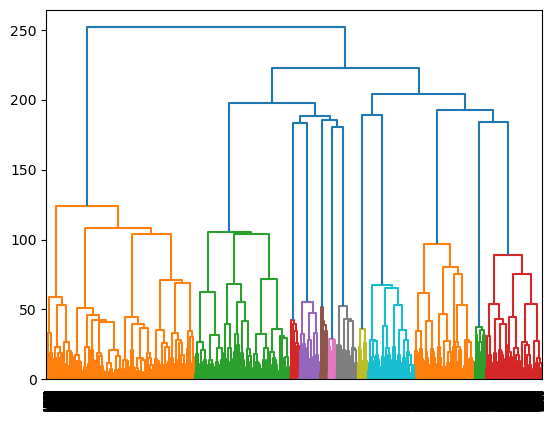

In [259]:
warddend = dendrogram(wardlink)

In [257]:
from scipy.cluster.hierarchy import fcluster

In [331]:
#Method 1
#Uses Cophenetic distance using maxclust function
#The cophenetic distance between two objects is the height of the dendrogram where the two branches that include the two objects merge into a single branch.

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([3, 2, 1, ..., 2, 2, 2], dtype=int32)

In [332]:
df['clusters'] = clusters

In [333]:
df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score,clusters
0,1,24,3.5,1,1,0,77,3
1,1,31,3.0,5,0,0,51,2
2,1,31,1.0,4,0,0,47,1
3,3,31,2.0,9,0,0,65,3
4,1,30,4.0,7,0,0,61,2


Now, let us go ahead and export this particular into a csv and try to draw inferences from the clusters thus formed.

In [334]:
df.to_csv('Hierarchical Clustering output.csv')

#The above command is going export the file as a .csv into the location that the Jupyter Notebook is currently running.

In [335]:
df.head()
df['previous_year_rating']= data['previous_year_rating']
df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score,clusters
0,1,24,3.5,1,1,0,77,3
1,1,31,3.0,5,0,0,51,2
2,1,31,1.0,4,0,0,47,1
3,3,31,2.0,9,0,0,65,3
4,1,30,4.0,7,0,0,61,2


In [336]:
print(df.columns)


Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met_more_than_80', 'awards_won', 'avg_training_score',
       'clusters'],
      dtype='object')


In [337]:
df.drop(['employee_id','department','region','education','gender','recruitment_channel'],axis=1, errors='ignore', inplace=True)

In [338]:
df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score,clusters
0,1,24,3.5,1,1,0,77,3
1,1,31,3.0,5,0,0,51,2
2,1,31,1.0,4,0,0,47,1
3,3,31,2.0,9,0,0,65,3
4,1,30,4.0,7,0,0,61,2


In [339]:
df1 = df
df_clust = df1.groupby('clusters').mean()
df_clust.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
clusters,,,,,,,
1,1.252964,34.649713,3.118164,5.784895,0.261950,0.000000,49.672658
2,1.175957,34.838721,3.614276,5.870697,0.420758,0.003320,59.503757
3,1.315130,34.908261,3.323948,5.754641,0.382426,0.060025,77.353651


In [340]:
#This particular code snippet makes the above output into a data frame.

df_clust = df_clust.reset_index()
df_clust

,clusters,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,1,1.252964,34.649713,3.118164,5.784895,0.261950,0.000000,49.672658
1,2,1.175957,34.838721,3.614276,5.870697,0.420758,0.003320,59.503757
2,3,1.315130,34.908261,3.323948,5.754641,0.382426,0.060025,77.353651


In [341]:
cluster_freq = df['clusters'].value_counts().sort_index()
cluster_freq

clusters
1    5230
2    5723
3    6464
Name: count, dtype: int64

In [342]:
df_clust['Frequency'] = cluster_freq.values
df_clust

,clusters,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score,Frequency
0,1,1.252964,34.649713,3.118164,5.784895,0.261950,0.000000,49.672658,5230
1,2,1.175957,34.838721,3.614276,5.870697,0.420758,0.003320,59.503757,5723
2,3,1.315130,34.908261,3.323948,5.754641,0.382426,0.060025,77.353651,6464


In [344]:
#Cluster 1-
#Employees here seem to be struggling — they receive few rewards, have low KPI achievements, and show weak training outcomes.
#Action: Provide targeted skill development and performance improvement programs.

In [345]:
#Cluster 2-
#These employees perform steadily despite limited training. They likely have experience and intrinsic motivation.
#Action: Offer recognition and leadership training to retain and grow them.

In [346]:
#Cluster 3-
#Employees who actively train and score high tend to win awards and maintain solid KPI scores.
#Action: These are your “model employees.” Use them as internal mentors or benchmark profiles for recruitment